In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sn
from scipy.io import loadmat

In [3]:
def read_HSI():
    X=loadmat('KSC.mat')['KSC']
    y=loadmat('KSC_gt.mat')['KSC_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X,y
X,y=read_HSI()

X shape: (512, 614, 176)
y shape: (512, 614)


In [4]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band168,band169,band170,band171,band172,band173,band174,band175,band176,class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0


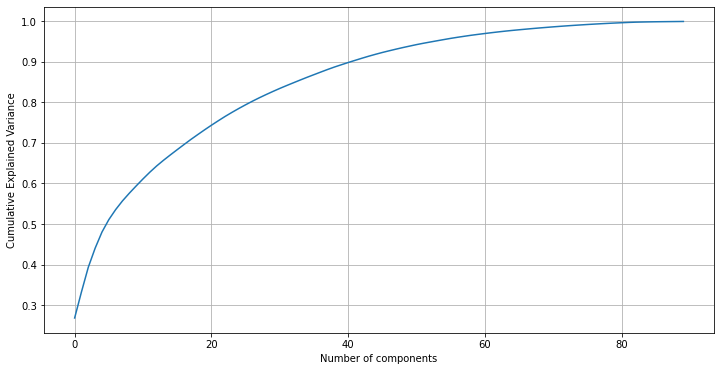

In [6]:
from sklearn.decomposition import PCA
pca= PCA(n_components=90)
principalComponents= pca.fit_transform(df.iloc[:,:-1].values)
evr = pca.explained_variance_ratio_
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(evr))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [8]:
pca= PCA(n_components=70)
dt= pca.fit_transform(df.iloc[:,:-1].values)
q= pd.concat([pd.DataFrame(data=dt),pd.DataFrame(data=y.ravel())],axis=1)
q.columns=[f'PC-{i}' for i in range(1,71)]+['class']
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-62,PC-63,PC-64,PC-65,PC-66,PC-67,PC-68,PC-69,PC-70,class
0,-3331.597574,654.059765,1637.411445,324.810134,119.808788,180.346125,37.990140,17.828702,28.145976,24.789437,...,1.646767,-79.969111,92.625376,-56.022779,-58.216722,125.574400,44.262225,77.076092,25.875288,0
1,-3552.851134,512.116448,1563.009512,226.053449,75.440677,5.651873,-44.361787,-38.483057,-8.630810,20.447965,...,4.671467,-47.231124,58.276816,-37.914721,-41.769612,85.830969,22.024162,57.864077,20.159498,0
2,-3502.131691,485.191669,1557.214896,224.727797,71.541543,-56.783270,-92.931940,-64.266426,-39.738854,24.038250,...,4.378877,-31.262856,40.618616,-26.434823,-31.160446,66.239545,11.813064,42.835505,18.243647,0
3,-3003.419096,784.559352,1725.550592,411.043551,153.232277,254.410856,63.207105,26.132865,24.091486,48.827769,...,-2.362625,-69.666967,90.407410,-33.679244,-43.580126,111.087821,50.447976,60.918036,18.493495,0
4,-2596.900801,1080.140108,1891.387939,600.012001,236.934772,634.215970,238.641348,143.717600,120.883532,65.499014,...,-5.715861,-156.480566,179.318425,-82.059694,-91.695305,217.400497,106.151063,121.931592,37.103609,0


In [9]:
q['class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

In [21]:

names=['Scrub'	,
'Willow swamp'	,
'CP hammrock'	,
'CP/oak'	,
'Slash pine'	,
'Oak/broadleaf'	,
'Hardwood swamp'	,
'Graminoid marsh'	,
       'Spartina marsh',
'Cattail marsh',
       'Salt marsh',
       'Mud flats',
       'Water'
      ]

In [15]:
x= q[q['class']!=0]
X=x.iloc[:,:-1].values
y=x.loc[:,'class'].values


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
svm=SVC (C=100,kernel='rbf',cache_size=10*1024)
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

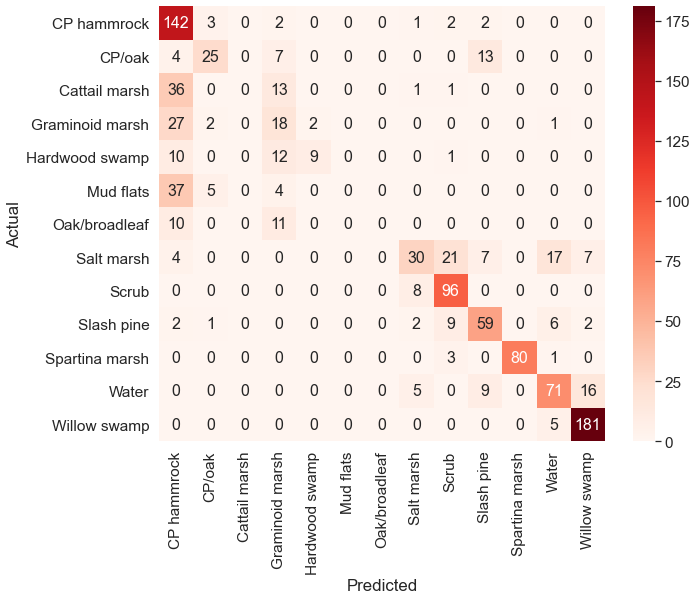

In [22]:
data=confusion_matrix (y_test,ypred)
df_cm=pd.DataFrame(data,columns=np.unique(names),index=np.unique(names))
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)#label size
sns.heatmap(df_cm,cmap="Reds",annot=True,annot_kws={"size":16},fmt='d')
# plt.savefig('cmap.png',dpi=300)

In [23]:
print(classification_report(y_test,ypred,target_names=names))

                 precision    recall  f1-score   support

          Scrub       0.52      0.93      0.67       152
   Willow swamp       0.69      0.51      0.59        49
    CP hammrock       0.00      0.00      0.00        51
         CP/oak       0.27      0.36      0.31        50
     Slash pine       0.82      0.28      0.42        32
  Oak/broadleaf       0.00      0.00      0.00        46
 Hardwood swamp       0.00      0.00      0.00        21
Graminoid marsh       0.64      0.35      0.45        86
 Spartina marsh       0.72      0.92      0.81       104
  Cattail marsh       0.66      0.73      0.69        81
     Salt marsh       1.00      0.95      0.98        84
      Mud flats       0.70      0.70      0.70       101
          Water       0.88      0.97      0.92       186

       accuracy                           0.68      1043
      macro avg       0.53      0.52      0.50      1043
   weighted avg       0.63      0.68      0.64      1043



C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
